GRIP :THE SPARKs FOUNDATION
Data Science and Business Analytics Intern
Author: Ankita Mishra
Task (1) :STUDENT MARKS PREDICTION

# 1. Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sng
import matplotlib.pyplot as plt

# STEP:2 Reading Data Set

In [3]:
df=pd.read_csv('C:\\Users\\Admin\\Downloads\\marks.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape


(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# STEP:3 Visualization

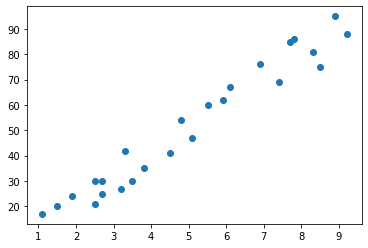

In [8]:
plt.scatter(df["Hours"],df["Scores"])

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# STEP:4 Data-Slicing

In [10]:
#slicing of dataframe
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [12]:
print(x_train.size)

20


In [13]:
print(x_test.size)

5


In [14]:
print(y_test.size)

5


# STEP:5 Training The Algorithm

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# STEP:6 Visualizing The Model

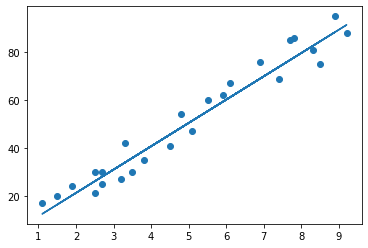

In [16]:
plt.scatter(df["Hours"],df["Scores"])
y_value=lr.coef_*x+lr.intercept_
plt.plot(x,y_value)

# STEP:7 Making Prediction

In [18]:
pred=lr.predict(x_test)

In [19]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':pred})
actual_predicted

,Target,Predicted
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


# STEP:8 What would be the predicated score if a student studies for 9.25 hours/day?

In [20]:
c=lr.intercept_
print(x)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


In [21]:
m=lr.coef_
print(m)

[9.74054996]


In [22]:
h=9.25
a=m*h+c
print("If a student studies for {} hours per day he/she will score {} % in exam .".format(h,a))

If a student studies for 9.25 hours per day he/she will score [91.85582532] % in exam .


# STEP:9 Checking the assumption of linear regression

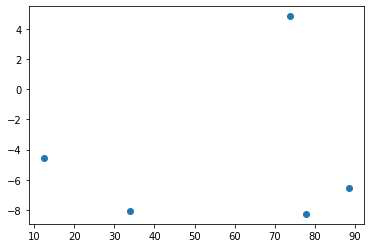

In [23]:

plt.scatter(pred,pred-y_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

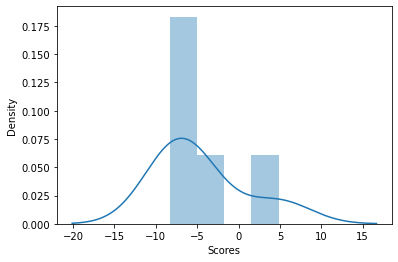

In [24]:
sng.distplot(pred-y_test)

# STEP:10 Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y_test,pred)
print('MEAN ABSOLUTE ERROR:-',error)

MEAN ABSOLUTE ERROR:- 6.457450193167183


In [26]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR:-',error)

MEAN SQUARED ERROR:- 44.1652107906905


In [27]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_Score:-',r2_score)

R2_Score:- 0.9466449081971943
